# Recording tours analysis


For this challenge, we are interested in finding out **how much people enjoy recording Tours in komoot—and to what extent they want to continue doing so**. 

We suspect that this data will vary as a result of time because we have worked continously in the past trying on improving this feature. We also asume that the success of our recording feature varies across countries.

Please analyze the data we prepared for you and **calculate and interpret country-specific retention rates over time**.

You are free to use the language and tools of your choice. Summarize your findings and send them to us via email. 

Also, please explain how you approached this challenge and attach any code or notebooks you used. We want to see how you identified your findings, so please keep your submission as transparent as possible.


## Data preparation & EDA (Explanatory Data Analysis)

**Importing Librairies**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import reverse_geocoder as rg
%matplotlib inline 

**Reading and printing the first 5 rows of the data using Pandas**

In [2]:
df = pd.read_csv('tour-events.csv')
df.head()

,timestamp,user,sport,longitude,latitude
0,2016-05-29 06:00:00,51663fe728afd0c03701845329190f7fe93c3a8ab2ff56...,hike,16.1,47.7
1,2016-08-15 19:00:00,08f0a9cb02168dce9544c7ce237eb2a291901a048bad24...,hike,12.0,47.7
2,2016-05-14 19:00:00,0762522db4b59efa5a11a535c88477d6c7a63972febdda...,hike,9.4,51.8
3,2017-06-12 20:00:00,70cc307f4148283217dadfcbff54eb9e7d7a944a0b57f6...,touringbicycle,7.8,48.0
4,2014-05-25 09:00:00,c1fc1e63e5e3875538ca23351954ed39405ec27b0c15bb...,mtb,6.8,50.6


**Overall statitics about the data**

In [3]:
df.describe()

,longitude,latitude
count,676380.000000,676380.000000
mean,8.602698,49.398039
std,14.639131,5.410601
min,-170.900000,-55.000000
25%,7.800000,48.200000
50%,9.300000,50.100000
75%,11.500000,51.600000
max,178.100000,71.200000


**Checking and handling null values**

As you can see below the dataframe holds some null values present in in longitude and latitude variable. The null values are representing only 0,047% of the entire dataframe, and also it wouldn't make sense to replace theme the median, mode or mean of their respective variable, I then decide to delete them. I am also checking if the data has any duplicate values that could impact the analysis. 

In [4]:
df.isnull().sum() #checking of there are null values in the dataset

timestamp      0
user           0
sport          0
longitude    321
latitude     321
dtype: int64

In [5]:
df.dropna(inplace = True) #droping rows with null values, 321 in total. 

In [6]:
df.drop_duplicates().info() #CHECKING if there are duplicate values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669958 entries, 0 to 676700
Data columns (total 5 columns):
timestamp    669958 non-null object
user         669958 non-null object
sport        669958 non-null object
longitude    669958 non-null float64
latitude     669958 non-null float64
dtypes: float64(2), object(3)
memory usage: 30.7+ MB


**Creating the country variable from the latitude and longitude provided**

In [7]:
#put them into list and create tuples
lat = df['latitude'].tolist()
lon = df['longitude'].tolist()
oo = tuple(zip(lat, lon))

#search the coordinate using reverse_geocoder 
results = rg.search(oo,mode=1)

#put the results into a new dataframe and print the tail
ff = pd.DataFrame(results)
ff.tail(10)

Loading formatted geocoded file...


,lat,lon,name,admin1,admin2,cc
676370,49.9,6.61667,Hosten,Rheinland-Pfalz,,DE
676371,47.9,9.51667,Ebenweiler,Baden-Wuerttemberg,Tuebingen Region,DE
676372,44.99467,9.00862,Voghera,Lombardy,Provincia di Pavia,IT
676373,47.39218,8.00503,Niedererlinsbach,Solothurn,Bezirk Goesgen,CH
676374,52.49005,13.29602,Halensee,Berlin,,DE
676375,48.69406,9.16809,Leinfelden-Echterdingen,Baden-Wuerttemberg,Regierungsbezirk Stuttgart,DE
676376,51.09162,6.89217,Monheim am Rhein,North Rhine-Westphalia,,DE
676377,50.49372,6.62896,Nettersheim,North Rhine-Westphalia,Regierungsbezirk Koln,DE
676378,48.68569,8.18876,Buhlertal,Baden-Wuerttemberg,Karlsruhe Region,DE
676379,51.31667,9.5,Kassel,Hesse,Regierungsbezirk Kassel,DE


In [8]:
#create a new index to ease the merge of the two dataframes ff and df 
newindex = list(range(0,676380))
df['newind']= newindex
ff['newind']= newindex

#merge them 
dfin = pd.merge(left=df, right=ff, on='newind')

#get the name of the colums
dfin.columns

Index(['timestamp', 'user', 'sport', 'longitude', 'latitude', 'newind', 'lat',
       'lon', 'name', 'admin1', 'admin2', 'cc'],
      dtype='object')

In [9]:
#use the columns names list to filter and keep the ones I am interested in + print the head of the final df
final_df = dfin[['timestamp', 'user', 'sport', 'longitude', 'latitude','name', 'admin1', 'admin2', 'cc']]
final_df.head()

,timestamp,user,sport,longitude,latitude,name,admin1,admin2,cc
0,2016-05-29 06:00:00,51663fe728afd0c03701845329190f7fe93c3a8ab2ff56...,hike,16.1,47.7,Wartmannstetten,Lower Austria,Politischer Bezirk Neunkirchen,AT
1,2016-08-15 19:00:00,08f0a9cb02168dce9544c7ce237eb2a291901a048bad24...,hike,12.0,47.7,Bayrischzell,Bavaria,Upper Bavaria,DE
2,2016-05-14 19:00:00,0762522db4b59efa5a11a535c88477d6c7a63972febdda...,hike,9.4,51.8,Hoexter,North Rhine-Westphalia,Regierungsbezirk Detmold,DE
3,2017-06-12 20:00:00,70cc307f4148283217dadfcbff54eb9e7d7a944a0b57f6...,touringbicycle,7.8,48.0,Umkirch,Baden-Wuerttemberg,Freiburg Region,DE
4,2014-05-25 09:00:00,c1fc1e63e5e3875538ca23351954ed39405ec27b0c15bb...,mtb,6.8,50.6,Bad Munstereifel,North Rhine-Westphalia,Regierungsbezirk Koln,DE


**Data Standardisation**

Now that I have the initial dataset with the country codes and other information that could be interesting for further analysis (city, state ...), I would like instead of the country code have the country names written in plain english. For example AT = Austria. By curiosity i am checking how many coutry code are we dealing with:  

In [10]:
final_df['cc'].unique()

array(['AT', 'DE', 'RO', 'GR', 'US', 'GB', 'BE', 'CZ', 'IT', 'FR', 'CH',
       'SE', 'TW', 'ES', 'NL', 'ID', 'SI', 'JP', 'DK', 'PL', 'CY', 'FI',
       'HR', 'LT', 'HU', 'SC', 'PT', 'CA', 'LV', 'BR', 'TZ', 'TR', 'MX',
       'NO', 'RU', 'IN', 'LU', 'LK', 'MY', 'ZA', 'AZ', 'TH', 'MT', 'PE',
       'SK', 'MM', 'CU', 'EG', 'AU', 'MK', 'CR', 'CL', 'MA', 'CN', 'RS',
       'IE', 'NZ', 'IS', 'HK', 'VN', 'PH', 'LI', 'IL', 'AR', 'BG', 'SG',
       'NP', 'JE', 'KH', 'BA', 'MU', 'AE', 'GT', 'IR', 'UA', 'ME', 'CO',
       'RE', 'KR', 'SD', 'OM', 'YE', 'PS', 'EE', 'AL', 'PA', 'SA', 'DO',
       'PK', 'CK', 'LA', 'ST', 'BB', 'BW', 'EC', 'GE', 'MZ', 'QA', 'PR',
       'NI', 'NA', 'SX', 'IM', 'BT', 'SV', 'ZW', 'XK', 'TN', 'JO', 'BY',
       'MV', 'DZ', 'UZ', 'AD', 'VE', 'HN', 'AX', 'BD', 'SM', 'GI', 'KW',
       'UG', 'SY', 'AM', 'MQ', 'KZ', 'TM', 'AW', 'UY', 'BQ', 'VG', 'FO',
       'TJ', 'BO', 'NG', 'AS', 'SO', 'GP', 'CV', 'ZM', 'KG', 'JM', 'GG',
       'KE', 'IQ', 'MD', 'GM', 'YT', 'SZ', 'KN', 'D

In [11]:
final_df['cc'].nunique()

160

That's a lot to deal with manually, I am then importing an external dataset listing country specific information. Let's check it! 

In [12]:
df_country = pd.read_csv('country.csv')
df_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Perfect, we have at least one common variable the "alpha-2" to merge the two datasets on!

**Merging the two datasets**

In [13]:
#merging while selecting necessary variables
aaa = pd.merge(left = final_df, right = df_country[['name','alpha-2','region']], how='left', on = None,left_on=['cc'], right_on = ['alpha-2'])

#renaming the columns for consistency 
ab = aaa.rename(columns={"name_x": "city", "admin1": "state",'admin2':'sub_state','name_y':'country','cc':'country_code','region':'continent'})

#remove duplicate column
df_final = ab.loc[:, ab.columns != 'alpha-2']

#print the head of the df_final dataframe
df_final.head()

,timestamp,user,sport,longitude,latitude,city,state,sub_state,country_code,country,continent
0,2016-05-29 06:00:00,51663fe728afd0c03701845329190f7fe93c3a8ab2ff56...,hike,16.1,47.7,Wartmannstetten,Lower Austria,Politischer Bezirk Neunkirchen,AT,Austria,Europe
1,2016-08-15 19:00:00,08f0a9cb02168dce9544c7ce237eb2a291901a048bad24...,hike,12.0,47.7,Bayrischzell,Bavaria,Upper Bavaria,DE,Germany,Europe
2,2016-05-14 19:00:00,0762522db4b59efa5a11a535c88477d6c7a63972febdda...,hike,9.4,51.8,Hoexter,North Rhine-Westphalia,Regierungsbezirk Detmold,DE,Germany,Europe
3,2017-06-12 20:00:00,70cc307f4148283217dadfcbff54eb9e7d7a944a0b57f6...,touringbicycle,7.8,48.0,Umkirch,Baden-Wuerttemberg,Freiburg Region,DE,Germany,Europe
4,2014-05-25 09:00:00,c1fc1e63e5e3875538ca23351954ed39405ec27b0c15bb...,mtb,6.8,50.6,Bad Munstereifel,North Rhine-Westphalia,Regierungsbezirk Koln,DE,Germany,Europe


In [14]:
#checking if all the country codes have a coresponding country name
df_final[df_final['country'].isnull()]['country_code'].unique()

array(['NA', 'XK'], dtype=object)

So, at this stage it's like the merging task has been done properly except for two country codes, NA and XK, after a quick google search to get the name if the countries, I decide to change update the dataset manually!

In [15]:
mask = df_final['country_code'] == 'NA'
cou = 'country'
con = 'continent'
df_final.loc[mask, cou] = 'Namibia'
df_final.loc[mask, con] = 'Africa'

mask2 = df_final['country_code'] == 'XK'
cou2= 'country'
con2= 'continent'
df_final.loc[mask2, cou2] = 'Kosovo'
df_final.loc[mask2, con2] = 'Europe'

#checking if there are any missing values

df_final.isnull().sum()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


timestamp       0
user            0
sport           0
longitude       0
latitude        0
city            0
state           0
sub_state       0
country_code    0
country         0
continent       0
dtype: int64

Great! We are good to go!Before to answer the real question, let's explore a bit more the data

**Users count distribution ** 

In other words, How often in general users used the feature. The right visual is a zommed version of the left one. Most people come back between 0 and 20 times. 

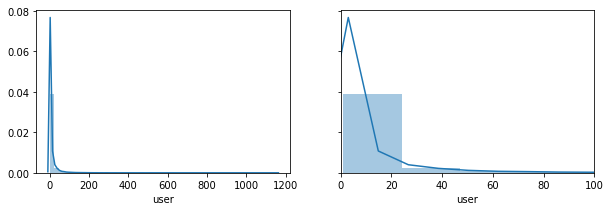

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize= (10,3))
sns.distplot(df_final['user'].value_counts(), ax= ax1)
g = sns.distplot(df_final['user'].value_counts(),ax = ax2)
g.set(xlim=(0, 100));

**Count of users by sport**

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


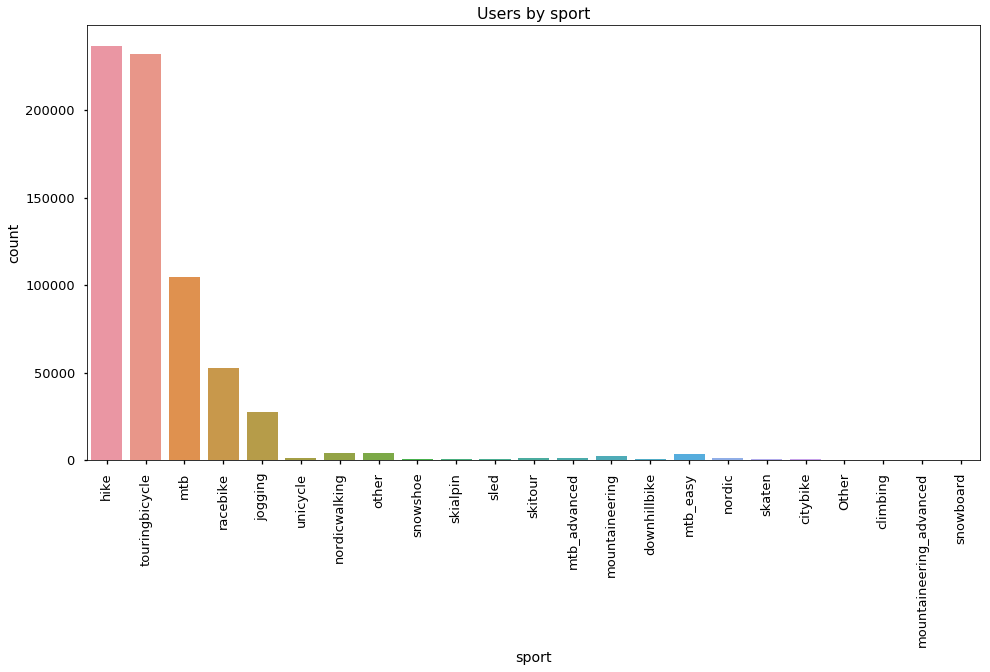

In [17]:
sns.set_context("talk")
plt.figure(figsize = (16,8))
plt.xticks(rotation=90)
plt.title("Users by sport")
sns.countplot(x='sport', data=df_final);

**Is it different by country?**

Let's only check for the 5 top countries

In [18]:
df_final.groupby('country')['user'].count().sort_values(ascending=False).head(5)

country
Germany        530610
Austria         38156
Italy           22281
Switzerland     13711
Spain           11585
Name: user, dtype: int64

In [19]:
best_sport = pd.DataFrame(df_final['user'].groupby([df_final['sport'],df_final['country'],df_final['country_code']]).size()).reset_index()
bsp = best_sport[(best_sport['country']=='Germany')|(best_sport['country']=='Austria')|(best_sport['country']=='Italy')|(best_sport['country']=='Switzerland')|(best_sport['country']=='Spain')]


In [20]:
bsp.head()

,sport,country,country_code,user
0,Other,Germany,DE,16
1,Other,Italy,IT,2
2,citybike,Austria,AT,19
7,citybike,Germany,DE,265
9,citybike,Italy,IT,4


/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


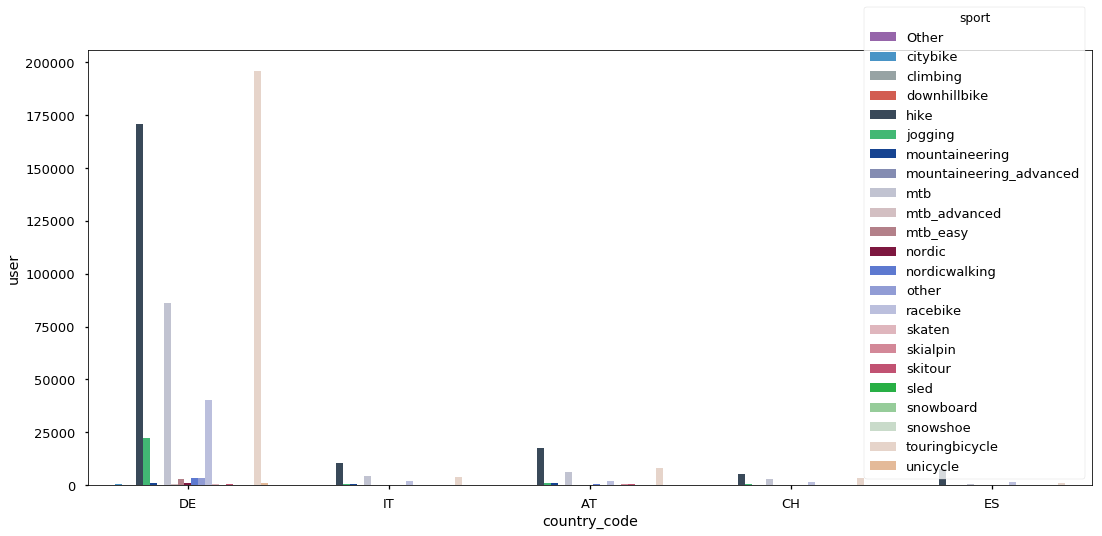

In [21]:
plt.figure(figsize = (18,8))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#023fa5", "#7d87b9", "#bec1d4", "#d6bcc0", "#bb7784", "#8e063b", "#4a6fe3", "#8595e1", "#b5bbe3", "#e6afb9", "#e07b91", "#d33f6a", "#11c638", "#8dd593", "#c6dec7", "#ead3c6", "#f0b98d", "#ef9708", "#0fcfc0", "#9cded6", "#d5eae7", "#f3e1eb", "#f6c4e1", "#f79cd4"]
ax = sns.barplot(x='country_code', y='user', data = bsp, hue= 'sport',palette=flatui)

Germany is clearly the first destination, an important difference is noted with the other top countries. The question i am then wondering how many countries in average a user is visiitng ? 

In [22]:
zones = df_final[['user','country_code']].drop_duplicates()
zones.groupby('user')['country_code'].size().mean()

1.3119953480644626

1.31 countries, interesting!Let'quickly plot the distribution of this count. 

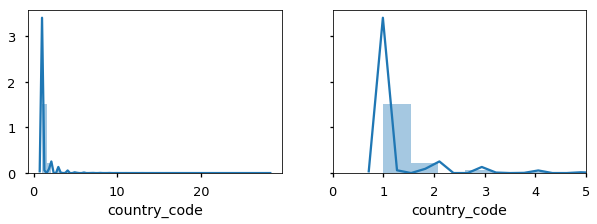

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize= (10,3))
sns.distplot(zones.groupby('user')['country_code'].size(),ax=ax1)
g = sns.distplot(zones.groupby('user')['country_code'].size(),ax=ax2)
g.set(xlim=(0, 5));

Alright, I am going to stop here with the data analysis, It was interesting to see that hiking and touring bycile are the most slected sport. This obsevation is also valid in our top 5 user countries (DE,AT,IT,CH,ES) however in Germany the touring bycle gets the first position. 
While doing this country split, I realised that the country is not necessarly the country the user is actually living. that means that people can record tours in germany but also in IT few month later. Knowing the customer real home location would be interting to know to go deeper in the analysis. 
For now, I can tell you that users have beenin average in 1.31 countries!

Let's now dive into the core issue of my stakeholder! 

**how much people enjoy recording Tours in komoot—and to what extent they want to continue doing so**.
Please analyze the data we prepared for you and **calculate and interpret country-specific retention rates over time**.

For this I am going to perform a **cohort analysis**! There is a very good tutorial written by Greg Reda that you can find [here](http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/).

## Cohort Analysis

**Getting the data**

In [24]:
#reformat the date fields 
from datetime import datetime
df_final['date'] = pd.to_datetime(df_final['timestamp']).apply(lambda x: x.strftime('%Y-%m'))
df_final['order_date'] = pd.to_datetime(df_final['timestamp']).apply(lambda x: x.strftime('%Y-%m-%d'))

#create a new dataframe with the needed info to perform the cohort analysis
dz = df_final[['user','country','date','order_date']]

#change the order_date variable data type
dz['order_date'] = pd.to_datetime(dz.order_date)

#print the head 
dz.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,user,country,date,order_date
0,51663fe728afd0c03701845329190f7fe93c3a8ab2ff56...,Austria,2016-05,2016-05-29
1,08f0a9cb02168dce9544c7ce237eb2a291901a048bad24...,Germany,2016-08,2016-08-15
2,0762522db4b59efa5a11a535c88477d6c7a63972febdda...,Germany,2016-05,2016-05-14
3,70cc307f4148283217dadfcbff54eb9e7d7a944a0b57f6...,Germany,2017-06,2017-06-12
4,c1fc1e63e5e3875538ca23351954ed39405ec27b0c15bb...,Germany,2014-05,2014-05-25


**Determine the user's cohort group based on their first used of the feature**

In [25]:
dz.set_index('user', inplace=True)
dz['CohortGroup'] = dz.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))
dz.reset_index(inplace=True)
dz.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user,country,date,order_date,CohortGroup
0,51663fe728afd0c03701845329190f7fe93c3a8ab2ff56...,Austria,2016-05,2016-05-29,2014-05
1,08f0a9cb02168dce9544c7ce237eb2a291901a048bad24...,Germany,2016-08,2016-08-15,2016-08
2,0762522db4b59efa5a11a535c88477d6c7a63972febdda...,Germany,2016-05,2016-05-14,2015-10
3,70cc307f4148283217dadfcbff54eb9e7d7a944a0b57f6...,Germany,2017-06,2017-06-12,2017-06
4,c1fc1e63e5e3875538ca23351954ed39405ec27b0c15bb...,Germany,2014-05,2014-05-25,2013-10


We now the cohort group assigned to each user. Forst example the user at index 0, used the feature for the first time in Austria in May 2014.

**Aggregate users by CohortGroup**

In [26]:
grouped = dz.groupby(['CohortGroup', 'date'])
grouped_1=grouped
# count the unique users, per Group + Period
cohort = grouped.agg({'user': pd.Series.nunique})

# make the column names more meaningful
cohort.rename(columns={'user': 'TotalUsers'}, inplace=True)
cohort.head()

TotalUsers
CohortGroup date               
2010-04     2010-04          34
            2010-05           4
            2010-06           4
            2010-08           2
            2010-09           2

In [27]:
#checking manually if the data is matching! 
dz[(dz['date']=='2010-06') & (dz['CohortGroup']=='2010-04')]['user'].nunique()

4

**Label the CohortPeriod for each CohortGroup**

In [28]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohort = cohort.groupby(level=0).apply(cohort_period)
cohort.head()

TotalUsers  CohortPeriod
CohortGroup date                             
2010-04     2010-04          34             1
            2010-05           4             2
            2010-06           4             3
            2010-08           2             4
            2010-09           2             5

We now have the cohort period listed. 

**Calculate the user retention by group**

In [29]:
# reindex the DataFrame
cohort.reset_index(inplace=True)
cohort.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size= cohort['TotalUsers'].groupby(level=0).first()
cohort_group_size.head(10)

CohortGroup
2010-04    34
2010-05    55
2010-06    52
2010-07    49
2010-08    44
2010-09    50
2010-10    26
2010-11    13
2010-12    11
2011-01    27
Name: TotalUsers, dtype: int64

In [30]:
#unstack
cohort['TotalUsers'].unstack(0).head()

CohortGroup,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,34.0,55.0,52.0,49.0,44.0,50.0,26.0,13.0,11.0,27.0,...,421.0,554.0,612.0,1483.0,2511.0,3287.0,3794.0,3776.0,4371.0,1171.0
2,4.0,4.0,10.0,4.0,3.0,2.0,1.0,1.0,2.0,2.0,...,114.0,159.0,240.0,621.0,973.0,1208.0,1319.0,1322.0,872.0,NaN
3,4.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,94.0,157.0,201.0,491.0,762.0,869.0,1048.0,536.0,NaN,NaN
4,2.0,2.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,92.0,152.0,167.0,416.0,672.0,794.0,488.0,NaN,NaN,NaN
5,2.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,...,111.0,132.0,158.0,368.0,674.0,386.0,NaN,NaN,NaN,NaN


In [31]:
#divide each column with corresponding cohort_group_size.
user_retention = cohort['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.117647,0.072727,0.192308,0.081633,0.068182,0.04,0.038462,0.076923,0.181818,0.074074,...,0.270784,0.287004,0.392157,0.418746,0.387495,0.367508,0.347654,0.350106,0.199497,NaN
3,0.117647,0.090909,0.038462,0.040816,0.022727,0.02,0.076923,0.153846,0.090909,0.074074,...,0.223278,0.283394,0.328431,0.331086,0.303465,0.264375,0.276226,0.141949,NaN,NaN
4,0.058824,0.036364,0.076923,0.020408,0.045455,0.02,0.038462,0.076923,0.090909,0.037037,...,0.218527,0.274368,0.272876,0.280512,0.267622,0.241558,0.128624,NaN,NaN,NaN
5,0.058824,0.054545,0.019231,0.040816,0.022727,0.02,0.038462,0.076923,NaN,0.037037,...,0.263658,0.238267,0.258170,0.248146,0.268419,0.117432,NaN,NaN,NaN,NaN
6,0.029412,0.018182,0.019231,0.040816,0.068182,0.06,0.076923,0.153846,NaN,0.037037,...,0.213777,0.241877,0.238562,0.265678,0.125050,NaN,NaN,NaN,NaN,NaN
7,0.058824,0.036364,0.019231,0.020408,0.045455,0.08,0.115385,0.076923,NaN,0.074074,...,0.218527,0.203971,0.240196,0.133513,NaN,NaN,NaN,NaN,NaN,NaN
8,0.029412,0.090909,0.038462,0.020408,0.068182,0.06,0.038462,0.076923,NaN,0.037037,...,0.190024,0.238267,0.119281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.058824,0.036364,0.038462,0.061224,0.022727,0.06,0.038462,0.076923,NaN,0.037037,...,0.230404,0.126354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's illustrate with an example what this table says : For instance, 26% of users in the 2016-12 used the feature again in month 4 months (in april 2016).Check the crossing between column 2016-12 and index 5.

**Let's plot it**

The heatmap and line plot below are giving an overall view on the retention rate over time.

What we can see: 
    - the first year cohorts had irregular periods, probably due to some contious enhancement of the feature. 
    - throughout the cohorts periods and groups we also notice a sesonal event, represented by the dark diagonal shape.It reprsents the lowest retention rates and matches with winter times.
    - In overall people reuse indeed the feature, the second graph shows an average rentention close to 20% over the different periods. However it important to note that the lign is pretty steady, the statisfaction level is comparable from a period to another in general. 
    - Zooming on the heatmap (2nd plot) we can actually see more precised rated. I decided to select the most recent cohorts with 35% retention rate on the second period. Depending on the business goal can be good or not. It's in general good in my opinion. 
    

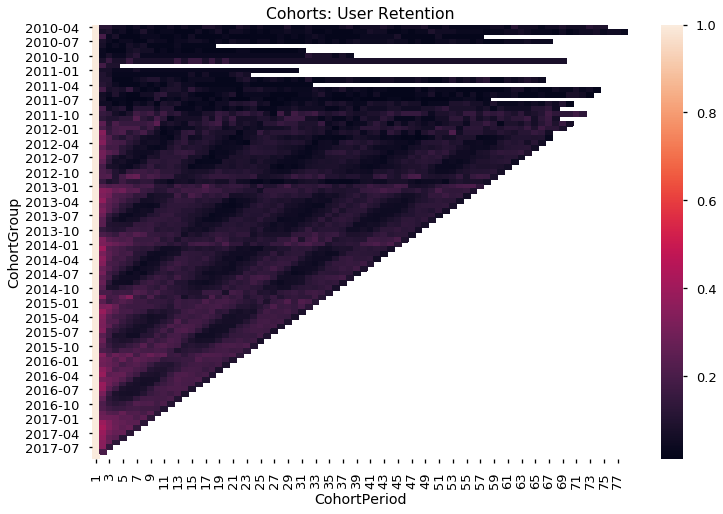

In [32]:
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull());

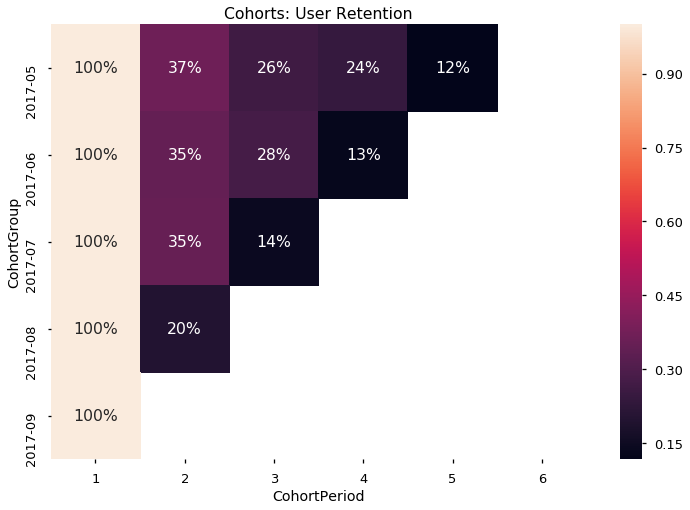

In [33]:
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T.iloc[-5:,:6], mask=user_retention.T.iloc[-5:,:6].isnull(), annot=True, fmt='.0%');

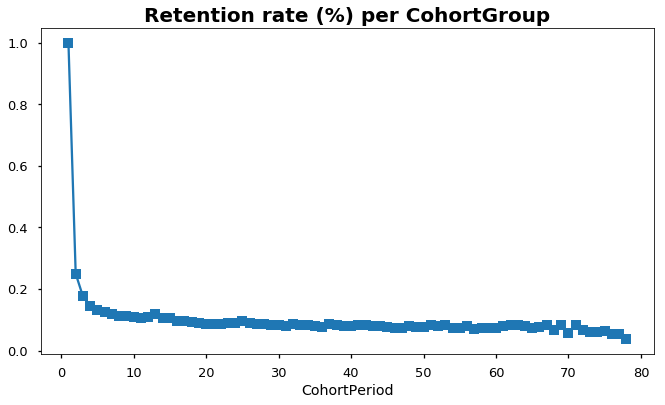

In [34]:
user_retention.T.mean().plot(figsize=(11,6), marker='s')
plt.title("Retention rate (%) per CohortGroup", fontsize=20, fontweight='bold')
ax.set_xlabel("CohortPeriod", fontsize=10)
ax.set_ylabel("Retention(%)", fontsize=10)
plt.show()

**However, I don't forget the question. How is the retention rate accross countries?**

I decide to create functions to create the graphs much quicker. Also, because we are dealing with 160 countries, I am going to stick with the top 3 in terms of users. 

In [47]:
#create the cohort table with the country variable added
grouped = dz.groupby(['CohortGroup', 'date','country'])
grouped_1=grouped
# count the unique users, per Group + Period
cohorts= grouped.agg({'user': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'user': 'TotalUsers'}, inplace=True)
cohorts = cohorts.groupby(['CohortGroup','country']).apply(cohort_period)
cohorts.head()

TotalUsers  \
CohortGroup date    country                                                          
2010-04     2010-04 Austria                                                     31   
                    Bhutan                                                       1   
                    Germany                                                     14   
                    Luxembourg                                                   1   
                    United Kingdom of Great Britain and Northern Ir...           1   

                                                                        CohortPeriod  
CohortGroup date    country                                                           
2010-04     2010-04 Austria                                                        1  
                    Bhutan                                                         1  
                    Germany                                                        1  
                    Luxembourg                                                     1  
                    United Kingdom of Great Britain and Northern Ir...             1

In [52]:
 def retentionbycountryheat (df,country_name,newtablename ="hey"):
        """
        Creates an country specific retention rate heatmap

        """
        newtablename = df.xs(country_name,level='country')
        # reindex the DataFrame
        newtablename.reset_index(inplace=True)
        newtablename.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)
        # create a Series holding the total size of each CohortGroup
        cohort_group_size = newtablename['TotalUsers'].groupby(['CohortGroup']).first()
        newtablename['TotalUsers'].unstack(0)
        newtablename  = newtablename['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
        fig, ax = plt.subplots(figsize=(11,6))   
        sns.heatmap(newtablename.T, mask=newtablename.T.isnull())
        #newtablename.T.mean().plot(figsize=(11,6), marker='s')
        plt.title("Retention rate (%) "+ country_name + " per CohortGroup", fontsize=10, fontweight='bold')
        #plt.set_xlabel("CohortPeriod", fontsize=10)
        #plt.set_ylabel("Retention(%)", fontsize=10)
        plt.show()

In [53]:
 def retentionbycountry (df,country_name,newtablename ="hey"):
        """
        Creates an country specific retention line plot: average retention rate troughtout periods.

        """
        newtablename = df.xs(country_name,level='country')
        # reindex the DataFrame
        newtablename.reset_index(inplace=True)
        newtablename.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)
        # create a Series holding the total size of each CohortGroup
        cohort_group_size = newtablename['TotalUsers'].groupby(['CohortGroup']).first()
        newtablename['TotalUsers'].unstack(0)
        newtablename  = newtablename['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
        #sns.heatmap(newtablename.T, mask=newtablename.T.isnull())
        newtablename.T.mean().plot(figsize=(11,6), marker='s')
        plt.title("Retention rate (%) "+ country_name + " per CohortGroup", fontsize=10, fontweight='bold')
        #plt.set_xlabel("CohortPeriod", fontsize=10)
        #plt.set_ylabel("Retention(%)", fontsize=10)
        plt.show()
 

**Print the data visualization by country**

Before to start, it's important to mention that this cohort analysis is based on users having the same starting date using the feature but also the location they have been to.

The issue here is that people don't nessarly stick to one country, there go in average in 1.3 locations. 
So in each group we will have people who started the journey at the same date but could have changed location overtime. 

That's why we note retention rates higher than 100%, because sometimes a specific periods gathers more people than the first initial period for a specifc cohort. 

The ideal cohort analysis should have been made would be to cluster people in terms of starting date and country they went to and at the same period. 
To have cleaner cluster could be an option but won't represent the reality, because people sticking to the feature and using in a different location than the country they started the jouney from won"t be taken into account.

For this project I am going to stick to the date as the main based and country at a specific period.

**.- - - - - - - .**

As seen Germany is the first destination is then not surprising that the graphs below are similar to the overall picture of the retention rates over time seen previously. Howvever with this graph below we see an important drop in retention rate after the 70's period, this drop is due to the small amount of data we have for this last periods. Indeed, most of the cohort groups haven't reach this number of months since there registration.

Looking at the heatmap we can see that the colors (retention rates) are not different from the other cohorts at comparable periods (1 to 5 for example). 

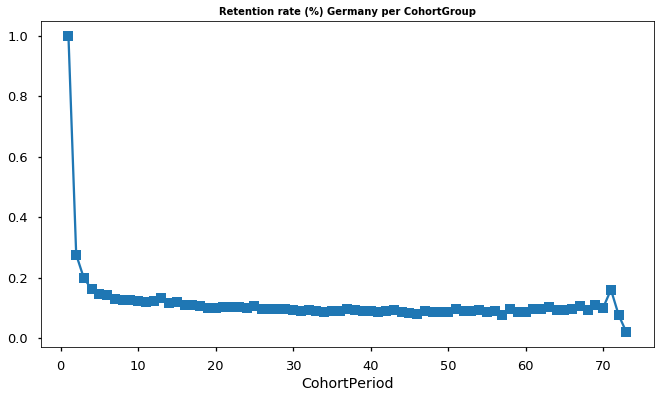

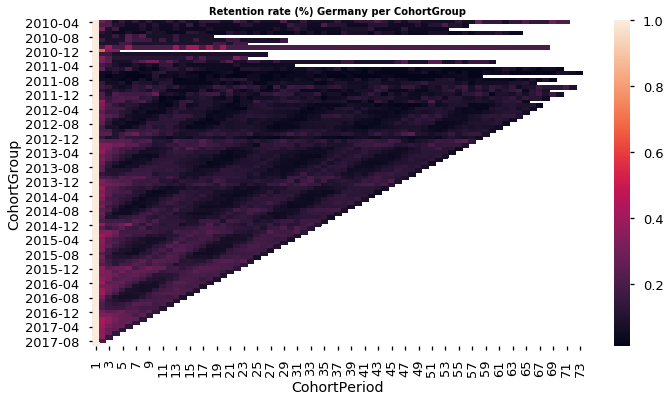

In [55]:
retentionbycountry(cohorts,'Germany')
retentionbycountryheat(cohorts, 'Germany')

In Austria, since the period 45 the retention rate is really changing, different from the steady line obeserved in germany. My assuming is that austria is a bit dependant on germany. Germany being the first distination where the feature is used. I guess Austria's reselys are linked to the vague of people moving from a place to another.
Let's verify this!

**From these people who used the tool in austria how many used it in germany too?** 

In [78]:
AT = pd.DataFrame(dz[dz['country']=='Austria']['user'].drop_duplicates())
DE = pd.DataFrame(dz[dz['country']=='Germany']['user'].drop_duplicates())

print('Austria has ' + str(len(AT))+ ' users')
print('Germany has ' + str(len(DE))+ ' users')

Austria has 6717 users
Germany has 50458 users


In [104]:
print('Exactly ' + str(len(pd.merge(AT,DE, on='user', how='inner'))) + ' been in Austria and also in Germany!')
per = round((len(pd.merge(AT,DE, on='user', how='inner'))/len(AT))*100,2)
print( 'Which representing ' + str(per) + '%' )

Exactly 4121 been in Austria and also in Germany!
Which representing 61.35%


That's an important portion, an explain have this more varied retention rate compared to germany. If the businss can grow an audience in aria as well the movement will be compensated. 

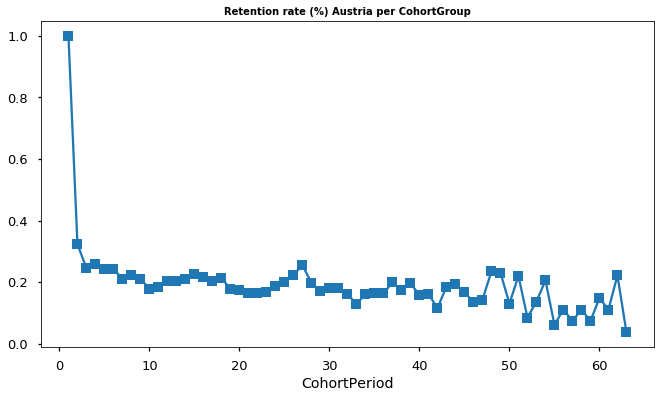

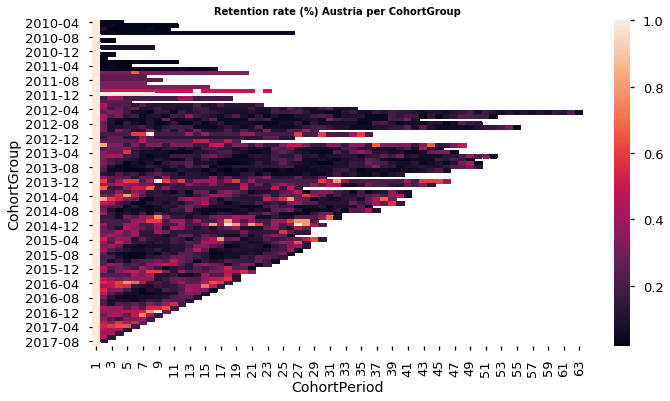

In [56]:
retentionbycountry(cohorts, 'Austria')
retentionbycountryheat(cohorts, 'Austria')

In Italy, we can see that the retention is actually eceeding the 100% that actually means that much more people actually use the feature in Italy that the initial number of user in the first period of the cohort but used the feature before in another country!

The ligh color in the heatmap shows the cohorts in question. 

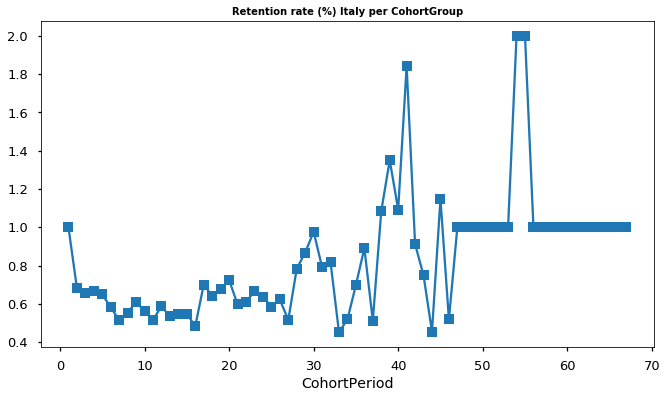

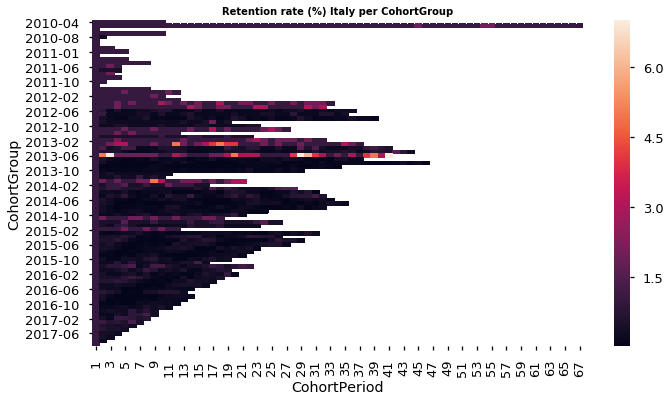

In [57]:
retentionbycountry(cohorts, 'Italy')
retentionbycountryheat(cohorts, 'Italy')

**Conclusion**

To conclude, the feature overtime is appreciated, results depending a lot on the destination we can easily zoom on some facts, such as that the last periods were less performing in terms of retention rate due to the lack of data only. 

The result overtime is varying for the first cohorts,we we see empty gaps in the heatmaps, the disapears over time, you managed to stabilised the retention rate. If the goal is to improve it, i suggest to continue testing new incorporating new element in the feature to improve its offer to the audience. 

The results is indeed different from a country to another, however other countries such as Austria or Italy are more seen as hosting countries for the moment having a small user base were the retention rate is high at some periods. These high retention rates are noticible because from a specific 1st of registration , people used the feature in different locations.

We also notice the impact on the months on the retention rate, people joining in cold times from october then to stop using the tool in this specific location after 6 to 7 months.

To compare from a country to another I am creating below the average periods per cohort in each country.
The use the of feature in german in in average longer than in other countries top 3 countries. 

In [137]:
def averageperiod (country_name):
    print('The average number of period by cohorot in ' +country_name +' is : ' + str(cohorts.xs(country_name,level='country').reset_index().groupby(['CohortGroup'],sort=False)['CohortPeriod'].max().mean()))
    

In [138]:
averageperiod('Austria')
averageperiod('Germany')
averageperiod('Italy')

The average number of period by cohorot in Austria is : 23.522222222222222
The average number of period by cohorot in Germany is : 38.68888888888889
The average number of period by cohorot in Italy is : 18.443181818181817


**Thanks for reading!**

Best

Bamby